## Introducción 


La pandemia de COVID-19 alteró significativamente las dinámicas sociales y personales a nivel global. El confinamiento, el distanciamiento social y la limitación de actividades al aire libre llevaron a muchas personas a buscar nuevas formas de entretenimiento y enriquecimiento personal dentro de sus hogares. Entre estas actividades, la lectura experimentó un resurgimiento notable, convirtiéndose en un refugio tanto para el ocio como para la introspección.

Este cambio en el comportamiento del consumidor despertó el interés de numerosas startups, que se apresuraron a desarrollar y lanzar aplicaciones dedicadas a los amantes de los libros. Estas plataformas no solo facilitaban el acceso a una amplia variedad de títulos, sino que también promovían la interacción y el intercambio de opiniones entre los lectores.

En este contexto, se ha puesto a disposición una base de datos de uno de los servicios emergentes en este competitivo mercado. Esta base de datos incluye información detallada sobre libros, editoriales, autores, así como las calificaciones y reseñas de los clientes. El análisis de estos datos permitirá obtener insights valiosos sobre las preferencias y comportamientos de los lectores durante este período.


## Objetivos del proyecto 

El objetivo general de este proyecto es analizar la base de datos proporcionada y evaluar el impacto de diferentes factores como la editorial, el autor y las características de los libros en las calificaciones y reseñas de los usuarios. El análisis permitirá ofrecer recomendaciones estratégicas para mejorar la oferta de productos

## Carga de librerías 


In [38]:
# Carga de librerías 

import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt 
import seaborn as sns

In [39]:
# Conexión con la base de datos 

db_config = {'user': 'practicum_student', # nombre de usuario
'pwd': 's65BlTKV3faNIGhmvJVzOqhs', # contraseña
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # puerto de conexión
'db': 'data-analyst-final-project-db'} # nombre de la base de datos


connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
db_config['pwd'],
db_config['host'],
db_config['port'],
db_config['db'])


engine = create_engine(connection_string, connect_args={'sslmode':'require'})


## Revisión de bases de datos

In [40]:
# Revisión de base de datos 'books'
query = """ 
SELECT *
FROM books;"""

book_db = pd.read_sql(query, engine)
book_db.sample(10)

,book_id,author_id,title,num_pages,publication_date,publisher_id
536,537,46,Reading Lolita in Tehran: A Memoir in Books,356,2003-12-30,243
571,572,542,Skeleton Crew,612,1993-05-13,326
29,30,447,A Long Way Down,368,2006-05-02,247
713,714,525,The End of Faith: Religion Terror and the Fu...,348,2005-09-17,320
582,583,164,Something Blue (Darcy & Rachel #2),338,2006-03-21,118
979,980,122,Wicked: The Grimmerie,192,2005-10-26,122
870,871,572,The Sinner (Rizzoli & Isles #3),419,2005-01-17,41
672,673,235,The Catcher in the Rye,277,2001-01-30,31
532,533,586,Rainbow Six (John Clark #2; Jack Ryan Univers...,912,1999-09-01,46
805,806,328,The Mysterious Island (Extraordinary Voyages ...,723,2004-04-27,183


In [41]:
# Revisión de base de datos 'authors'
query = """ 
SELECT *
FROM authors;"""

authors_db = pd.read_sql(query, engine)
authors_db.sample(10)

,author_id,author
219,220,Henry Miller/Jiří Níl
253,254,James Frey
238,239,J.R. Ward
306,307,John Irving
142,143,Dr. Seuss
311,312,John Steinbeck/Susan Shillinglaw
370,371,Lloyd Alexander
488,489,Richard Bach
10,11,Alexander McCall Smith
422,423,Napoleon Hill


In [42]:
# Revisión de base de datos 'publishers'
query=""" 
SELECT *
FROM publishers;"""

publishers_db = pd.read_sql(query, engine)
publishers_db.sample(10)


,publisher_id,publisher
180,181,McSweeney's
69,70,DAW
336,337,Wyatt Book
315,316,Virago
293,294,Tom Doherty Tor Fantasy
184,185,Mysterious Press
286,287,TIme Warner Books
22,23,Arthur A. Levine Books
238,239,Random House Audio Publishing Group
266,267,Signet Classics


In [43]:
# Revisión de base de datos 'ratings'

query= """ 
SELECT * 
FROM ratings;"""

ratings_db = pd.read_sql(query, engine)
ratings_db.sample(10)

,rating_id,book_id,username,rating
2097,2098,334,ulowe,5
6166,6167,948,daniel19,4
5014,5015,778,isaiahreyes,5
3932,3933,636,patriciajohnson,5
3313,3314,529,todd65,4
3503,3504,565,fconrad,4
1369,1370,240,sfitzgerald,4
2085,2086,331,martinadam,3
3685,3686,600,fieldsangela,4
5098,5099,784,jhill,4


In [44]:
# Revisión de base de datos 'reviews'

query = """ 
SELECT * 
FROM reviews;"""

reviews_db = pd.read_sql(query, engine)
reviews_db.sample(10)

,review_id,book_id,username,text
650,649,240,fieldsangela,Civil particularly hospital area crime old. De...
979,980,361,mariokeller,Degree green reason do ahead clear. Only food ...
2732,2733,977,ewerner,Role simple culture board. Old short marriage ...
844,845,309,fnguyen,News respond compare hotel economic also white...
1123,1124,414,valenciaanne,Tv president magazine whom stock. Still you al...
2753,2754,987,elliotttabitha,Fly generation low perform meeting beat. Offic...
2575,2575,919,martinyvonne,Wrong prove such entire. Cause upon party PM b...
2395,2395,860,taylorjeffrey,Above candidate laugh. Together face really sa...
396,396,143,tnolan,Camera require seat between energy allow own. ...
1181,1181,430,ubailey,Make magazine various think. Full shoulder tel...


## Obtención de información de las bases de datos

### Número de libros publicados después del 1 de enero de 2000

In [45]:
# Número de libros publicados después del 1 de enero de 2000
query = """
SELECT COUNT(*) AS num_books
FROM books
WHERE publication_date > '2000-01-01';
"""
num_books = pd.read_sql(query, engine)
print(num_books)

   num_books
0        819


Se tiene un total de 819 libros publicados después del 01 de enero del año 2000. 

### Número de reseñas de usuarios y la calificación promedio para cada libro.

In [46]:
# Número de reseñas de usuarios y la calificación promedio para cada libro.
query = """
SELECT
    b.title,
    COUNT(r.review_id) AS num_reviews,
    AVG(rt.rating) AS avg_rating
FROM books b
LEFT JOIN reviews r ON b.book_id = r.book_id
LEFT JOIN ratings rt ON b.book_id = rt.book_id
GROUP BY b.title;
"""
reviews_and_ratings = pd.read_sql(query, engine)


In [47]:
reviews_and_ratings.sort_values(by='avg_rating', ascending=False).head(10)

,title,num_reviews,avg_rating
845,The Walking Dead Book One (The Walking Dead #...,4,5.0
453,Marvel 1602,4,5.0
704,Geek Love,4,5.0
220,School's Out—Forever (Maximum Ride #2),12,5.0
890,The Woman in Black,4,5.0
350,The Demon-Haunted World: Science as a Candle i...,4,5.0
614,Homage to Catalonia,4,5.0
654,Captivating: Unveiling the Mystery of a Woman'...,4,5.0
35,Stone of Farewell (Memory Sorrow and Thorn #2),2,5.0
787,The Adventures of Tom Sawyer and Adventures of...,2,5.0


In [48]:
reviews_and_ratings['avg_rating'].value_counts().reset_index().sort_values(by='avg_rating', ascending=False)

,avg_rating,count
5,5.000000,44
75,4.875000,1
70,4.833333,1
21,4.750000,5
10,4.666667,18
...,...,...
9,2.500000,20
48,2.333333,2
87,2.250000,1
32,2.000000,3


In [49]:
reviews_and_ratings.sort_values(by='avg_rating', ascending=True).head(10)


,title,num_reviews,avg_rating
72,Harvesting the Heart,4,1.500000
354,Drowning Ruth,9,2.000000
160,His Excellency: George Washington,4,2.000000
513,Junky,4,2.000000
679,The World Is Flat: A Brief History of the Twen...,12,2.250000
658,The Kitchen God's Wife,9,2.333333
435,The Mermaid Chair,9,2.333333
844,Prep : A Novel,4,2.500000
292,Monster,4,2.500000
296,The Rules of Attraction,4,2.500000


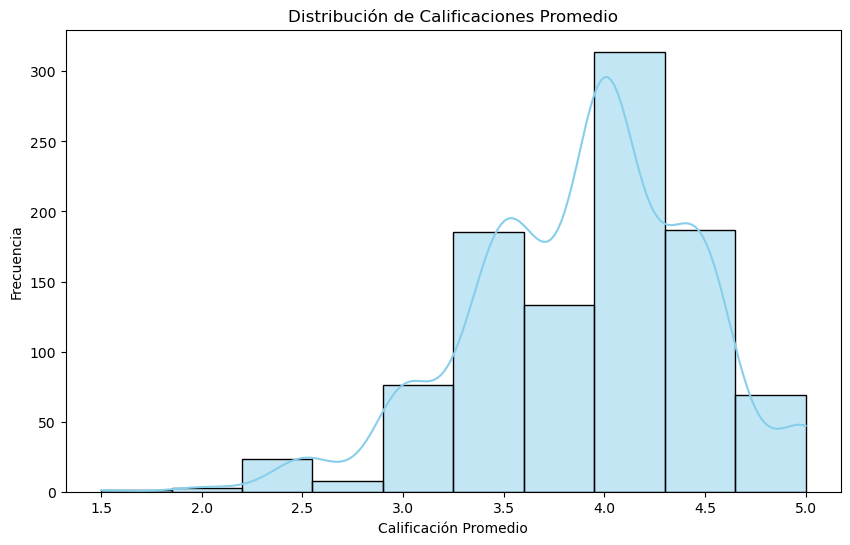

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(reviews_and_ratings['avg_rating'], bins=10, kde=True, color='skyblue')
plt.title('Distribución de Calificaciones Promedio')
plt.xlabel('Calificación Promedio')
plt.ylabel('Frecuencia')
plt.show()

In [51]:
reviews_and_ratings['avg_rating'].mean()

3.899115008317752

In [52]:
reviews_and_ratings['num_reviews'].mean()

26.193193193193192

De los libros pubolicados, se tienen 44 valorados con 5 una calificación promedio de 5, y solo 1 valorado con una califación promedio de 1.5; la calificación mas frecuente es de 4.0 puntos. La calificación promedio fue de 3.89 y el número promedio de revisiones fue de 26.19. 

### Editorial con el mayor número de libros, con más de 50 páginas 

In [53]:
# Editorial con el mayor número de libros, con más de 50 páginas 
query = """
SELECT
    p.publisher,
    COUNT(b.book_id) AS num_books
FROM books b
JOIN publishers p ON b.publisher_id = p.publisher_id
WHERE b.num_pages > 50
GROUP BY p.publisher
ORDER BY num_books DESC
LIMIT 1;
"""
top_publisher = pd.read_sql(query, engine)
print(top_publisher)

       publisher  num_books
0  Penguin Books         42


La editorial 'Penguin Books' es la que tiene el mayor número de libros publicados con más de 50 páginas. 

### Autor con la más alta calificación promedio de libros (al menos 50 calificaciones)

In [54]:
# Autor con la más alta calificación promedio de libros (al menos 50 calificaciones)
query = """
SELECT
    a.author,
    AVG(rt.rating) AS avg_rating
FROM books b
JOIN authors a ON b.author_id = a.author_id
JOIN ratings rt ON b.book_id = rt.book_id
GROUP BY a.author
HAVING COUNT(rt.rating_id) >= 50
ORDER BY avg_rating DESC
LIMIT 1;
"""
top_author = pd.read_sql(query, engine)
print(top_author)

           author  avg_rating
0  Diana Gabaldon         4.3


El autor Diana Gabaldon tiene la calificación más alta. 

### Número promedio reseñas de texto entre usuasrios que calificaron más de 50 libros 

In [55]:
# Número promedio reseñas de texto entre usuasrios que calificaron más de 50 libros 
query = """
WITH user_reviews_count AS (
    SELECT
        username,
        COUNT(rating_id) AS num_ratings
    FROM ratings
    GROUP BY username
    HAVING COUNT(rating_id) > 50
)
SELECT
    AVG(urc.num_ratings) AS avg_reviews
FROM user_reviews_count urc
JOIN reviews r ON urc.username = r.username;
"""
avg_reviews = pd.read_sql(query, engine)
print(avg_reviews)

   avg_reviews
0         54.5


El número promedio de reseñas es de 54.5. 

# Conclusiones generales


El análisis de los datos revela varias tendencias significativas en la publicación y valoración de libros después del 1 de enero de 2000. Se observa que en este período se publicaron un total de 819 libros, lo que demuestra un interés sostenido en la producción literaria. Dentro de este grupo, la calificación promedio de los libros fue de 3.89, con una calificación más frecuente de 4.0 puntos, lo que indica una valoración generalmente positiva por parte de los lectores.

Un hallazgo notable es que 44 libros recibieron una calificación perfecta de 5, mientras que solo uno recibió una calificación baja de 1.5. Esto sugiere que, aunque la mayoría de los libros fueron bien recibidos, hubo una notable dispersión en la calidad percibida por los usuarios.

La editorial 'Penguin Books' se destaca como la más prolífica en la publicación de libros con más de 50 páginas, lo que la coloca como un jugador clave en la industria. Además, la autora Diana Gabaldon fue identificada como la que tiene la calificación más alta, lo que refleja su popularidad y la apreciación de su obra por parte de los lectores.

Por último, el número promedio de reseñas por libro es de 26.19, y entre los usuarios que calificaron más de 50 libros, el promedio de reseñas es de 54.5, lo que sugiere un alto nivel de compromiso y participación de los usuarios más activos en la plataforma.

En conjunto, estos resultados proporcionan una visión integral del panorama literario reciente y destacan las preferencias y comportamientos de los lectores en este periodo.
